### VOLVE Dataset Preliminary Study - production data




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [8]:
df = pd.read_csv('Volve_production_data.csv', sep =';', decimal = ',' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   month                     15634 non-null  int64  
 2   year                      15634 non-null  int64  
 3   month-year                15634 non-null  object 
 4   WELL_BORE_CODE            15634 non-null  object 
 5   NPD_WELL_BORE_CODE        15634 non-null  int64  
 6   NPD_WELL_BORE_NAME        15634 non-null  object 
 7   NPD_FIELD_CODE            15634 non-null  int64  
 8   NPD_FIELD_NAME            15634 non-null  object 
 9   NPD_FACILITY_CODE         15634 non-null  int64  
 10  NPD_FACILITY_NAME         15634 non-null  object 
 11  ON_STREAM_HRS             15349 non-null  float64
 12  AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 13  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 14  AVG_DP

In [9]:
rate_cols = ['BORE_OIL_VOL','BORE_GAS_VOL','BORE_WAT_VOL','BORE_WI_VOL']
df[rate_cols] = df[rate_cols].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   month                     15634 non-null  int64  
 2   year                      15634 non-null  int64  
 3   month-year                15634 non-null  object 
 4   WELL_BORE_CODE            15634 non-null  object 
 5   NPD_WELL_BORE_CODE        15634 non-null  int64  
 6   NPD_WELL_BORE_NAME        15634 non-null  object 
 7   NPD_FIELD_CODE            15634 non-null  int64  
 8   NPD_FIELD_NAME            15634 non-null  object 
 9   NPD_FACILITY_CODE         15634 non-null  int64  
 10  NPD_FACILITY_NAME         15634 non-null  object 
 11  ON_STREAM_HRS             15349 non-null  float64
 12  AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 13  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 14  AVG_DP

In [10]:
df.insert(1,'N', df.groupby(['NPD_WELL_BORE_NAME']).cumcount())

In [33]:
df['FLOW_KIND'] == 'production'

0         True
1         True
2         True
3         True
4         True
         ...  
15629     True
15630     True
15631     True
15632     True
15633    False
Name: FLOW_KIND, Length: 15634, dtype: bool

In [39]:
wells = df['NPD_WELL_BORE_NAME'].unique()
pwells = df[df['FLOW_KIND'] == 'production']['NPD_WELL_BORE_NAME'].unique()
iwells = df[df['FLOW_KIND'] == 'injection']['NPD_WELL_BORE_NAME'].unique()

wells, pwells, iwells

(array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
        '15/9-F-4', '15/9-F-5'], dtype=object),
 array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
        '15/9-F-5'], dtype=object),
 array(['15/9-F-4', '15/9-F-5'], dtype=object))

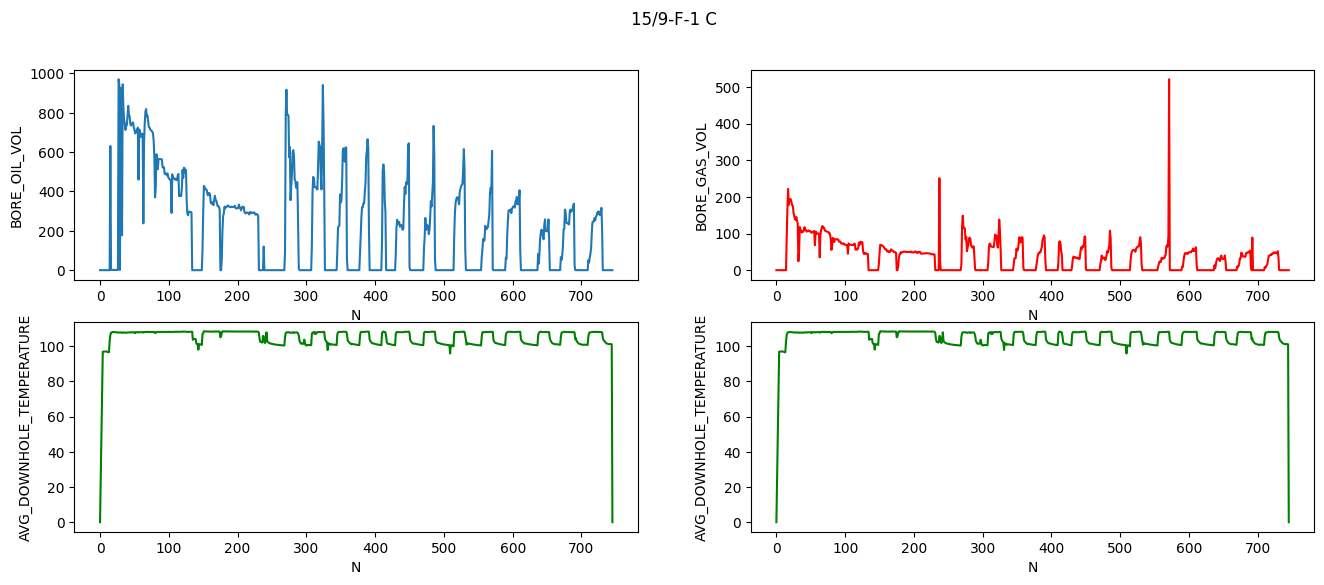

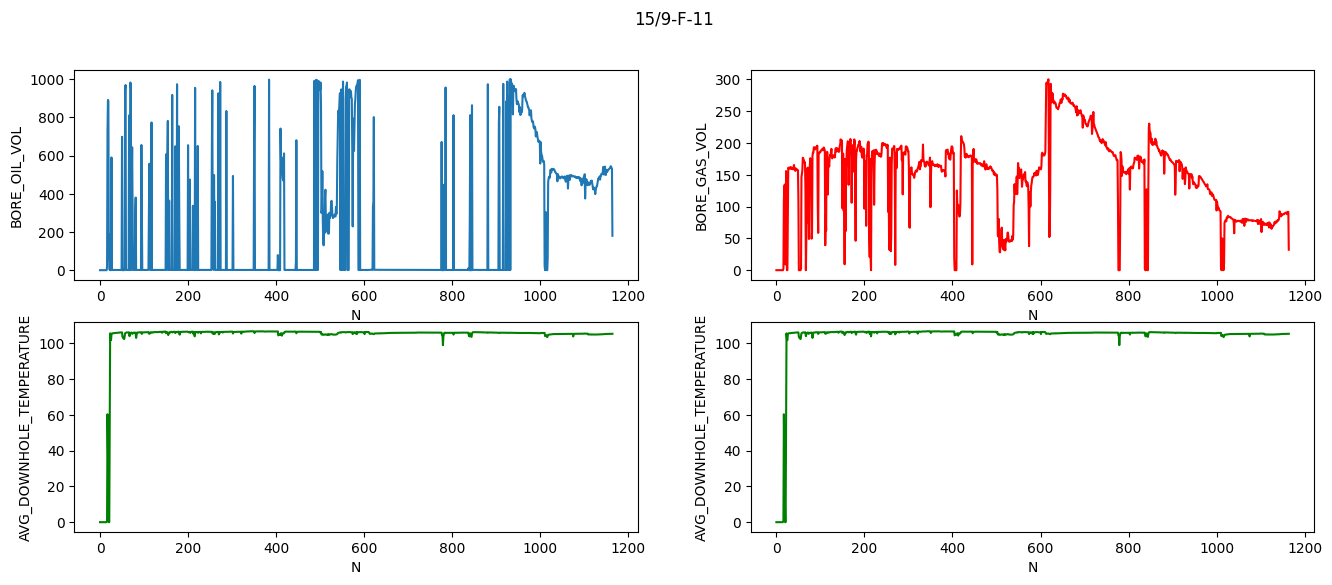

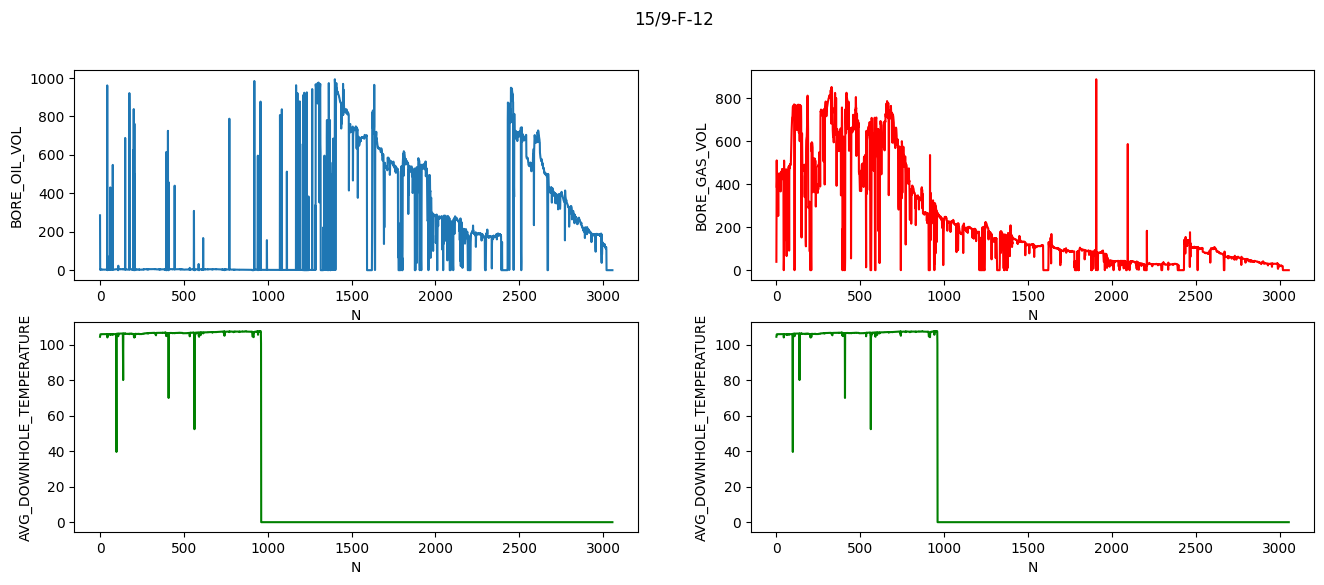

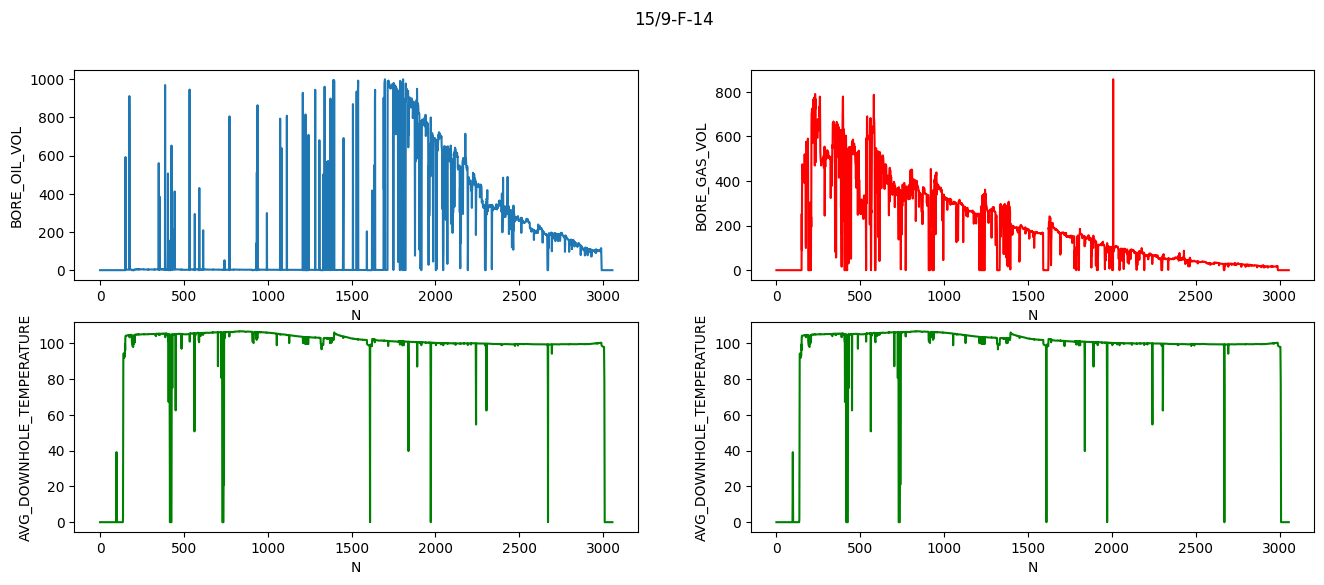

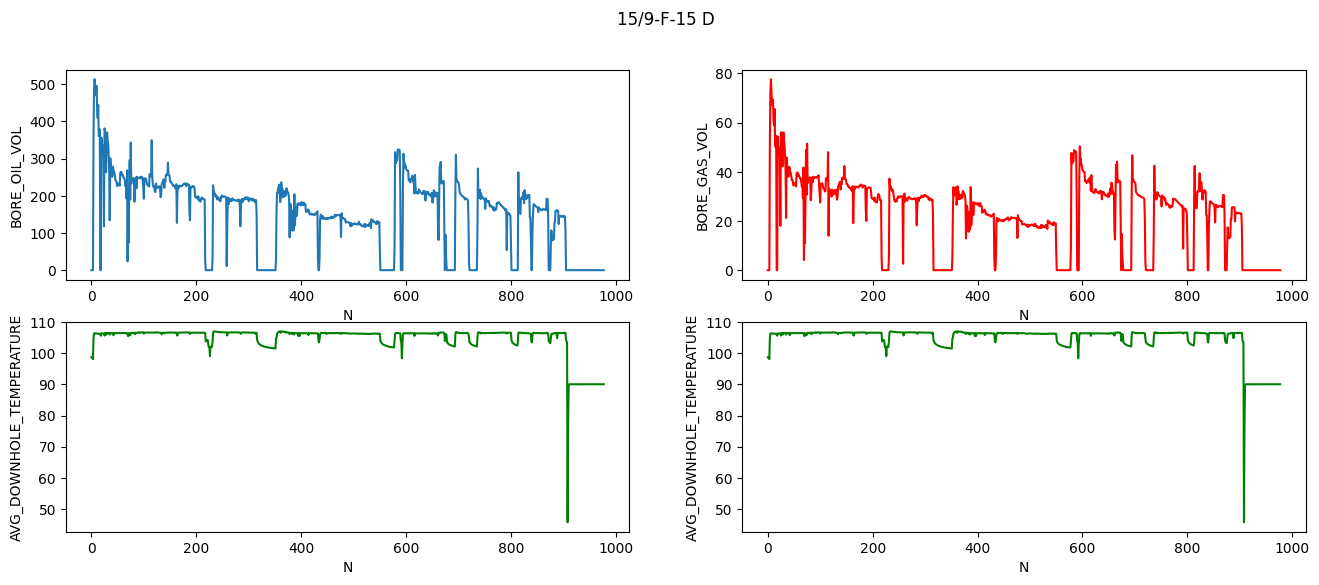

In [54]:


for well in pwells[:-1]:
    plt.subplots(2,2,figsize=(12,8))
    plt.subplot(221)
    sns.lineplot(data=df[df['NPD_WELL_BORE_NAME'] == well], x='N', y='BORE_OIL_VOL')
    plt.subplot(222)
    sns.lineplot(data=df[df['NPD_WELL_BORE_NAME'] == well], x='N', y='BORE_GAS_VOL', color='r')
    plt.subplot(223)
    sns.lineplot(data=df[df['NPD_WELL_BORE_NAME'] == well], x='N', y='BORE_OIL_VOL', color='g')
    plt.subplot(224)
    sns.lineplot(data=df[df['NPD_WELL_BORE_NAME'] == well], x='N', y='AVG_DOWNHOLE_TEMPERATURE', color='g')
    
    plt.suptitle(well)

pass;



# plt.figure(figsize=(16,8))
# sns.lineplot(data=df, x='N', y='BORE_WI_VOL', hue='NPD_WELL_BORE_NAME')